In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

In [82]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [83]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
"""
# 1) For numeric data
"""
df_numerical = training[['Age', 'SibSp','Parch', 'Fare']]

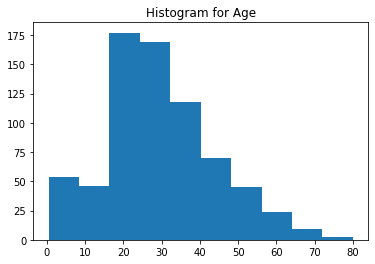

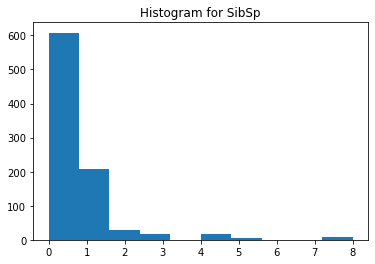

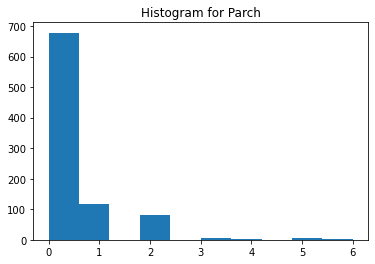

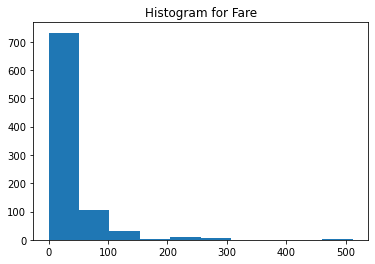

In [85]:
# Made histograms to understand distributions
for i in df_numerical.columns:
    plt.hist(df_numerical[i])
    plt.title("Histogram for "+ i)
    plt.show()

Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


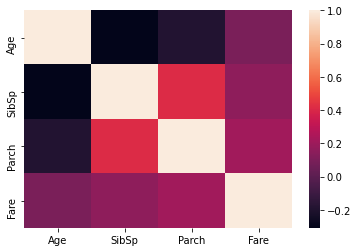

In [86]:
# correlation plot
# really important 'cause we want to avoid multicolinearity 
numerical_corr = df_numerical.corr()
print(numerical_corr )
sns.heatmap(numerical_corr)


In [87]:
# Pivot table comparing survival rate across numeric variables (Age, SibSp, Parch, and Fare )
# getting average values
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


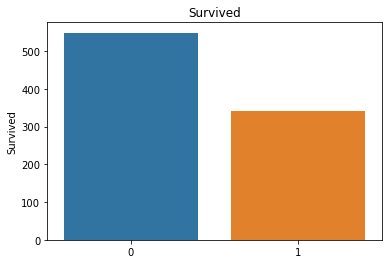

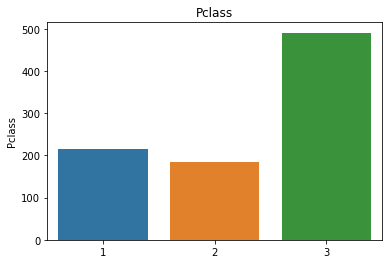

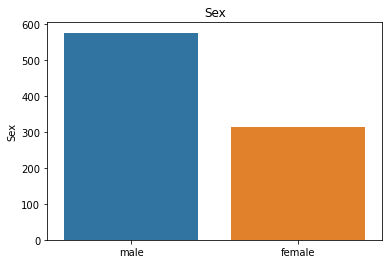

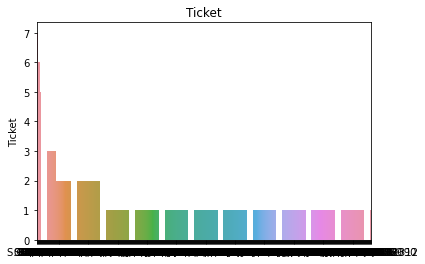

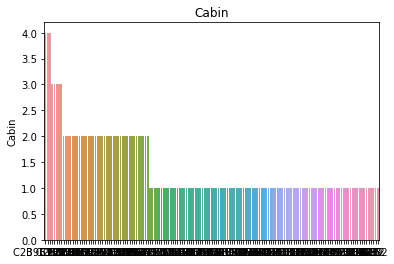

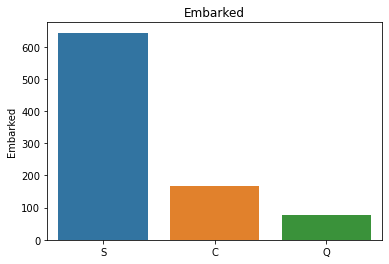

In [88]:
"""
2) For Categorical Data

"""

df_categorical = training[['Survived', 'Pclass', 'Sex' , 'Ticket', 'Cabin', 'Embarked']]
# Made bar charts to understand balance of classes
for i in df_categorical.columns:
    df_categ_counts = df_categorical[i].value_counts()
    sns.barplot(df_categ_counts.index , df_categ_counts ).set_title(i)
    plt.show()


In [89]:
df_categorical['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F2             3
              ..
A23            1
A26            1
C99            1
C82            1
C32            1
Name: Cabin, Length: 147, dtype: int64

In [90]:
# Made pivot tables to understand relationship with survival
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Name' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Name' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Name' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [91]:
# Explore interesting themes 
    # Wealthy survive? 
    # By location 
    # Age scatterplot with ticket price 
    # Young and wealthy Variable? 
    # Total spent? 

In [92]:
""" Feature engineering """

' Feature engineering '

In [93]:
#1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or
#    the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

training['cabin_multiple'] = training['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this  letters 
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [94]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [95]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

training['cabin_letter'] = training.Cabin.apply(lambda x: str(x)[0])


#comparing surivial rate by cabin
print(training['cabin_letter'].value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_letter', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64


cabin_letter,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [96]:
#understand ticket values better 
#numeric vs non numeric 
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['letters_ticket'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

training['letters_ticket'].value_counts()


0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
pp             3
wep            3
sopp           3
scah           2
swpp           2
ppp            2
sotono2        2
scahbasle      1
fc             1
casoton        1
sop            1
fa             1
as             1
scow           1
sp             1
sca4           1
sc             1
Name: letters_ticket, dtype: int64

In [97]:
 
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [98]:
#2) Tickets - Do different ticket types impact survival rates?
#difference in numeric vs non-numeric tickets in survival rate 

pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

#survival rate across different tyicket types 
pd.pivot_table(training,index='Survived',columns='letters_ticket', values = 'Ticket', aggfunc='count')

letters_ticket,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [99]:
#3) Does a person's title relate to survival rates?
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
#mr., ms., master. etc
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Mme               1
Jonkheer          1
Don               1
Ms                1
Lady              1
Sir               1
the Countess      1
Capt              1
Name: name_title, dtype: int64

In [ ]:

"""
DATA PREPROCESSING FOR BUILDING THE MODEL
1) Drop null values from Embarked (only 2)
2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)
Variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder).
4) Impute data with mean for fare and age (Should also experiment with median)
5) Normalized fare using logarithm to give more semblance of a normal distribution
6) Scaled data 0-1 with standard scaler
"""


In [101]:
training['train_test'] = 1
testing['train_test'] = 0
testing['Survived'] = np.NaN
all_data = pd.concat([training,testing]) # testing df gets Nan in new columns from train_df

all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_multiple',
       'cabin_letter', 'numeric_ticket', 'letters_ticket', 'name_title',
       'train_test'],
      dtype='object')

In [102]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_letter,numeric_ticket,letters_ticket,name_title,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,n,0.0,a5,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,C,0.0,pc,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,n,0.0,stono2,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,C,1.0,0,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,n,1.0,0,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,NaN,NaN,NaN,NaN,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,NaN,NaN,NaN,NaN,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,NaN,NaN,NaN,NaN,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,NaN,NaN,NaN,NaN,0


In [103]:
#create all categorical variables that we did above for both training and test sets 
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_letter'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['letters_ticket'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [104]:
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_letter,numeric_ticket,letters_ticket,name_title,train_test
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0,a5,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0,pc,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0,stono2,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1,0,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1,0,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,n,0,a5,Mr,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,C,0,pc,Dona,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,n,0,sotonoq,Mr,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,n,1,0,Mr,0


In [105]:
# check for null values in each column
all_data.isnull().sum()
#5 columns have at least 1 null value
# - Survived field in testing df are all null
# - Age 264 nulls
# - 1 Fare is null
# - 1014 cabin fields are null
# - 2 rows, have Embarked as null (on training set)

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                263
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin             1014
Embarked             2
cabin_multiple       0
cabin_letter         0
numeric_ticket       0
letters_ticket       0
name_title           0
train_test           0
dtype: int64

In [106]:
#impute nulls for continuous data 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(training.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

In [107]:
all_data.isnull().sum()

PassengerId          0
Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin             1014
Embarked             2
cabin_multiple       0
cabin_letter         0
numeric_ticket       0
letters_ticket       0
name_title           0
train_test           0
dtype: int64

In [108]:
#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.dropna(subset=["Embarked"], inplace=True)

In [109]:
all_data.SibSp.value_counts()

0    889
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [110]:
all_data.Parch.value_counts()


0    1000
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

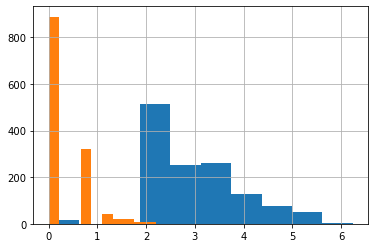

In [111]:
# log norm of fare (used)
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist()

In [112]:
# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)
all_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_letter,numeric_ticket,letters_ticket,name_title,train_test,norm_fare,norm_sibsp
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n,0,a5,Mr,1,2.110213,0.693147
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,0,pc,Mrs,1,4.280593,0.693147
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n,0,stono2,Miss,1,2.188856,0.000000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,1,0,Mrs,1,3.990834,0.693147
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n,1,0,Mr,1,2.202765,0.000000


In [113]:

#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_letter','cabin_multiple','numeric_ticket','name_title','train_test']])
#We drop: passengerID, Name, Ticket, fare, Cabin, letters_ticket
all_dummies

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric_ticket,train_test,Pclass_1,Pclass_2,Pclass_3,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.0,1,0,2.110213,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,38.0,1,0,4.280593,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,26.0,0,0,2.188856,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,35.0,1,0,3.990834,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,35.0,0,0,2.202765,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,2.202765,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,39.0,0,0,4.699571,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,38.5,0,0,2.110213,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,28.0,0,0,2.202765,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [114]:
"""Split to train test again"""

'Split to train test again'

In [115]:
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

In [116]:
y_train = all_data[all_data.train_test==1].Survived
y_train.shape

(889,)

In [123]:
"""Scale Data"""
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [133]:
"""Model Building (Baseline Validation Performance)
 I will try the following models using 10 fold cross validation to get a baseline. With a validation set basline, we can see how much tuning improves each of the models. 
 """
from sklearn.model_selection import cross_val_score
k_folds = 10

def cross_validation_result(x):
    print(cv)
    print(str(round(x.mean()*100,2))+ "%")

In [157]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=k_folds)
cross_validation_result(cv)


[0.65168539 0.71910112 0.71910112 0.75280899 0.84269663 0.7752809
 0.80898876 0.69662921 0.74157303 0.75      ]
74.58%


In [156]:

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=k_folds)
cross_validation_result(cv)

[0.65168539 0.6741573  0.6741573  0.75280899 0.84269663 0.7752809
 0.79775281 0.69662921 0.76404494 0.73863636]
73.68%


In [135]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=k_folds)
cross_validation_result(cv)

[0.80898876 0.84269663 0.76404494 0.86516854 0.83146067 0.7752809
 0.83146067 0.83146067 0.86516854 0.86363636]
82.79%


In [136]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train,cv=k_folds)
cross_validation_result(cv)


[0.80898876 0.84269663 0.76404494 0.86516854 0.82022472 0.7752809
 0.83146067 0.83146067 0.86516854 0.86363636]
82.68%


In [137]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=k_folds)
cross_validation_result(cv)

[0.73033708 0.82022472 0.71910112 0.79775281 0.82022472 0.75280899
 0.7752809  0.76404494 0.83146067 0.79545455]
78.07%


In [158]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train_scaled,y_train,cv=k_folds)
cross_validation_result(cv)

[0.74157303 0.82022472 0.71910112 0.79775281 0.83146067 0.75280899
 0.7752809  0.76404494 0.83146067 0.79545455]
78.29%


In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=k_folds)
cross_validation_result(cv)


[0.73033708 0.82022472 0.7752809  0.80898876 0.85393258 0.76404494
 0.86516854 0.79775281 0.82022472 0.86363636]
81.0%


In [139]:
nn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=k_folds)
cross_validation_result(cv)

[0.7752809  0.83146067 0.75280899 0.84269663 0.85393258 0.84269663
 0.82022472 0.79775281 0.86516854 0.82954545]
82.12%


In [140]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=k_folds)
cross_validation_result(cv)


[0.7752809  0.84269663 0.76404494 0.83146067 0.84269663 0.87640449
 0.79775281 0.75280899 0.86516854 0.84090909]
81.89%


In [165]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train_scaled,y_train,cv=10)
cross_validation_result(cv)

[0.78651685 0.84269663 0.76404494 0.83146067 0.84269663 0.87640449
 0.79775281 0.75280899 0.86516854 0.84090909]
82.0%


In [152]:
from sklearn.svm import SVC
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
cross_validation_result(cv)


[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
83.36%


In [145]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [151]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb, X_train_scaled,y_train,cv=5)
cross_validation_result(cv)

[0.82022472 0.81460674 0.85393258 0.79775281 0.81355932]
82.0%


In [153]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
cross_validation_result(cv)

[0.8258427  0.81460674 0.8258427  0.79775281 0.84745763]
82.23%


In [220]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': testing.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission_voting.csv', index=False)

In [ ]:
"""
Naive Bayes	74.58% ❎
Logistic Regression	82.79% ☑️
Decision Tree	78.29% ❎
K Nearest Neighbor 82.12% ☑️
Random Forest	82.0% ☑️
Support Vector Classifier	83.36%	 ☑️
Xtreme Gradient Boosting	82.0%	☑️
"""

In [161]:
"""Model Tuned Performance"""

'Model Tuned Performance'

In [162]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV # it doesnt try everything, it gives u best result from a random selection.

In [166]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))


In [167]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


In [168]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
KNN
Best Score: 0.8279375357074843
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.7s finished


In [ ]:
#Because the total feature space is so large, I used a randomized search to narrow down the paramters for the model. I took the best model from this and did a more granular search 

rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
clf_rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = clf_rf_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf_rnd,'Random Forest')

In [170]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.4min finished
Random Forest
Best Score: 0.8358027042468101
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


In [169]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
SVC
Best Score: 0.8335555132355742
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  2.3min finished


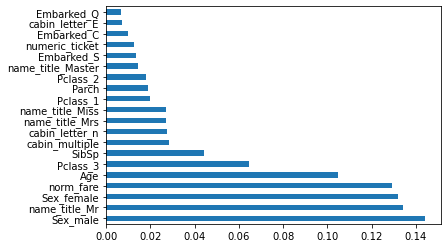

In [174]:
# so far, the best performance tuned model is RANDOM FOREST
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances_rf = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
features_rf = feat_importances_rf.nlargest(20)
features_rf.plot(kind='barh')

In [223]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [20, 50, 100, 250, 500,1000],
    'colsample_bytree': [0.2, 0.5, 0.7, 0.8, 1],
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
    'subsample': [0.5,0.6,0.7, 0.8, 0.9],
    'learning_rate':[.01,0.1,0.2,0.3,0.5, 0.7, 0.9],
    'gamma':[0,.01,.1,1,10,100],
    'min_child_weight':[0,.01,0.1,1,10,100],
    'sampling_method': ['uniform', 'gradient_based']
}

clf_xgb_rnd = RandomizedSearchCV(xgb, param_distributions = param_grid, n_iter = 1000, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb_rnd = clf_xgb_rnd.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb_rnd,'XGB')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 703 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 1170 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 1925 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2700 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3720 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4977 out of 5000 | elapsed:  2.7min remaining:    0.6s
XGB
Best Score: 0.849279502317019
Best Parameters: {'subsample': 0.7, 'sampling_method': 'uniform', 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 0.1, 'max_depth': 15, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  2.8min finished


In [222]:
# but we have one more model: XGB extreme Gradient Booster
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  2.8min finished
XGB
Best Score: 0.8549101758395226
Best Parameters: {'colsample_bytree': 0.85, 'gamma': 1, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform', 'subsample': 0.65}


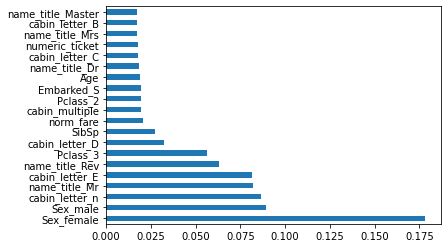

In [213]:
clf_xgb = best_clf_xgb.best_estimator_.fit(X_train_scaled,y_train)
feat_importances_xgb = pd.Series(clf_xgb.feature_importances_, index=X_train_scaled.columns)
features_xgb = feat_importances_xgb.nlargest(20)
features_xgb.plot(kind='barh')

In [214]:
type(features_rf)

pandas.core.series.Series

In [217]:
## find the common features between those models 
pd.Series(list(set(features_rf.index).intersection(set(features_xgb.index))))

0        name_title_Mrs
1                 SibSp
2            Embarked_S
3              Sex_male
4                   Age
5        cabin_letter_n
6         name_title_Mr
7             norm_fare
8            Sex_female
9     name_title_Master
10       numeric_ticket
11             Pclass_3
12             Pclass_2
13       cabin_multiple
14       cabin_letter_E
dtype: object

In [219]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': testing.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission.csv', index=False)
#We got 0.77 score on Kaggle, seems it is overfitting

In [ ]:
"""
Logistic Regression	82.79% -> 82.8%
K Nearest Neighbor 82.12% -> 82.8%
Random Forest	82.0%  -> 83.5%
Support Vector Classifier	83.36%	-> 83.35%
Xtreme Gradient Boosting	82.0%   -> 85.5%
"""

##  Ensemble Approaches